<div class="alert alert-block alert-info">

<b>Thank you for contributing to TeachOpenCADD!</b>

</div>

<div class="alert alert-block alert-info">

<b>Set up your PR</b>: Please check out our <a href="https://github.com/volkamerlab/teachopencadd/issues/41">issue</a> on how to set up a PR for new talktorials, including standard checks and TODOs.

</div>

# T001 · Scaffold-Based data split
Authors:

- Vahid Atabaigielmi, CADD seminar 2023, Volkamer lab, Center for Bioinformatics, Saarland University
- First and last name, year(s) of contribution, lab, institution

*The examples used in this talktorial template are taken from [__Talktorial T001__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T001_query_chembl/talktorial.ipynb) and [__Talktorial T002__](https://github.com/volkamerlab/teachopencadd/blob/master/teachopencadd/talktorials/T002_compound_adme/talktorial.ipynb).*

<div class="alert alert-block alert-info">

<b>Cross-referencing talktorials</b>: If you want to cross-reference to existing talktorials in your notebook, please use the following formatting: <b>Talktorial T000</b>.

</div>

## Aim of this talktorial

The aim of this talktorial is to to experiment with different scaffold_based splitting strategies and evaluate the performance of the GCNN model on  test sets to determine the most appropriate splitting approach.

### Contents in *Theory*

_Add Table of Contents (TOC) for Theory section._

* ChEMBL database
* Molecular Framework definition
* Data spliting methods
> * Murcko Scaffold based bining (scaffold network)
> * Murcko Scaffold clustering based split
> > * Within each Cluster (WC)
> > * Between Clusters (BC)
> * Random based spliting

* Overview of Tanimoto Similarity



<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Theory</i> section.

</div>

### Contents in *Practical*

_Add Table of Contents (TOC) for Practical section._

* Connect to ChEMBL database
* Load the Data
* Convert the canonical smiles to RDKit molecules
* Tanimoto similarity function
* Perform Murcko scaffold based spliting
* Perform the random split
* perform Scaffold_Cluster based splitting
* Calculates the Tanimoto similarity between training and test sets
* Plot trainng and test sets

<div class="alert alert-block alert-info">

<b>Sync TOC with section titles</b>: These points should refer to the headlines of your <i>Practical</i> section.

</div>

### References

* Paper 
* Tutorial links
* Other useful resources

*We suggest the following citation style:*
* Keyword describing resource: <i>Journal</i> (year), <b>volume</b>, pages (link to resource) 

*Example:*
* ChEMBL web services: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881) 

* ## Theory

### Molecular Framework definition
A molecular framework refers to the core structure of a molecule, which is composed of its ring systems, linkers, and exocyclic double bonds. It is obtained by removing all terminal side chains from the molecule, while retaining any double bonds that exist in the structure.
The concept of a molecular framework is particularly relevant in the study of cyclic molecules, where the focus is on the central ring system and its connectivity with other components. By simplifying the structure to its framework, researchers can analyze and compare the underlying core structure of different molecules, which can provide insights into their chemical properties and reactivity.
It's important to note that the molecular framework does not consider the specific substituents or functional groups attached to the rings or linkers. Instead, it provides a simplified representation of the cyclic structure, highlighting its fundamental connectivity and double bond arrangement.

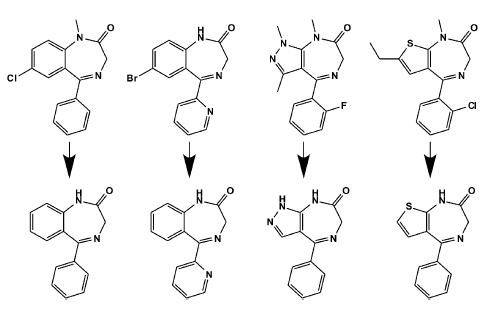
###### Bemis, Guy W., and Mark A. Murcko. "The properties of known drugs. 1. Molecular frameworks." 39.15 (1996): 2887-2893.

### Data spliting methods
Data splitting methods are techniques used to partition a dataset into subsets for training, validation, and testing purposes in machine learning and data analysis tasks. Here are several common data splitting methods:

#### Murcko Scaffold based splitting (scaffold network): 
This method involves grouping compounds based on their Murcko scaffolds, which represent the common core structure of molecules after removing side chains and retaining the ring systems. Compounds with similar scaffolds are grouped together, ensuring that molecules with similar core structures are placed in the same subset.

#### Murcko Scaffold clustering based split:
Similar to the scaffold network approach, this method involves clustering compounds based on their Murcko scaffolds. However, instead of grouping compounds with identical scaffolds, clustering algorithms are used to identify groups of compounds with similar scaffolds. This allows for more flexibility in capturing structural similarities within subsets.

##### Within each Cluster (WC):
In the context of scaffold-based clustering, this method involves splitting each cluster of compounds into subsets. It ensures that compounds within the same cluster are not split across different subsets, maintaining the structural similarity within each subset.

##### Between Clusters (BC):
This method involves splitting compounds between different clusters. It ensures that compounds from the same cluster are not placed in the same subset, promoting diversity and reducing potential bias during training or evaluation.

#### Random-based splitting:
This is a simple and commonly used method where the data is randomly divided into subsets. The random splitting can be performed in various ways, such as random assignment of samples to different subsets or randomly shuffling the entire dataset and then dividing it into subsets.

### Overview of Tanimoto Similarity
The Tanimoto algorithm states that A and B are sets of fingerprint “bits” within the fingerprints of molecule A and molecule B. AB is defined as the set of common bits of fingerprints of both molecule A and B. The resulting Tanimoto coefficient (or T(A,B)) ranges from 0, when the fingerprints have no bits in common, to 1, when the fingerprints are identical. Thus,
T(A,B) = (A ∩ B)/(A + B - A ∩ B)
The chemical similarity problem then becomes, Given molecule A, find all formulas that have a Tanimoto coefficient greater than a given threshold. The greater the value of a set threshold, the more similar the molecules are.

<div class="alert alert-block alert-info">

<b>Sync section titles with TOC</b>: Please make sure that all section titles in the <i>Theory</i> section are synced with the bullet point list provided in the <i>Aim of this talktorial</i> > <i>Contents in Theory</i> section.

</div>


<div class="alert alert-block alert-info">
    
<b>Beware of section levels</b>: Please check if you are using the correct subsection levels. The section <i>Theory</i> is written in Markdown as <code>## Theory</code>, so every subsection within <i>Theory</i> is <code>###</code> or lower.

</div>

### ChEMBL database

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.

![ChEMBL web service schema](./images/example_plot.png)

*Figure 1:* 
Describe figure and add reference.
Figure and description taken from: [<i>Nucleic Acids Res.</i> (2015), <b>43</b>, 612-620](https://academic.oup.com/nar/article/43/W1/W612/2467881).

<div class="alert alert-block alert-info">
    
<b>Figures</b>: Place images in the <code>images/</code> folder and include them using Markdown <code>![Figure title](images/some_figure.jpg)</code>. Add a figure caption in the format shown in the example.

</div>

<div class="alert alert-block alert-info">
    
<b>Formulas</b>: Please use LaTeX to format formulas.
</div>

If you place links, please link descriptive words.

> __Yes__: [ChEMBL](https://www.ebi.ac.uk/chembl/) is a manually curated database of bioactive molecules

> __No__: ChEMBL ([here](https://www.ebi.ac.uk/chembl/)) is a manually curated database of bioactive molecules

<div class="alert alert-block alert-info">
    
<b>Links</b>: If you place links, please link descriptive words.

</div>

* ## Practical

### Import all the necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.lines import Line2D
from IPython.display import display, Markdown
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from chembl_webresource_client.new_client import new_client
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Rdkit
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.ML.Cluster import Butina
#from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric
from rdkit.DataStructs import FingerprintSimilarity
from rdkit.Chem import Descriptors, Draw, PandasTools, MolFromSmiles, MolToSmiles

In [3]:
# DataSAIL
#import datasail.reader.read_molecules
#from datasail.cluster.ecfp import run_ecfp
#from datasail.reader.utils import DataSet
#from datasail.cluster.ecfp import run_ecfp
#from datasail.reader.read_molecules import read_molecule_data
#from datasail.reader.utils import read_csv, DataSet, read_data

In [4]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch_geometric.nn import GCNConv, GINConv
from torch_geometric.data import DataLoader
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx

In [5]:
# Set path to this notebook
HERE = Path(_dh[-1])
DATA = HERE / "output2500.tsv"

### Connect to ChEMBL database

In [46]:
targets_api = new_client.target
uniprot_id = "P00533"
targets = targets_api.get(target_components__accession=uniprot_id).only("target_chembl_id", "organism", "pref_name", "target_type")
targets = pd.DataFrame.from_records(targets)
target = targets.iloc[0]
chembl_id = target.target_chembl_id
required_features = ['molecule_chembl_id','canonical_smiles', 'standard_value']
res = new_client.activity.filter(target_chembl_id=chembl_id,standard_type="IC50").only(*required_features)[:7]
# Create a DataFrame from the results
data = [
    [
        item.get('molecule_chembl_id'),
        item.get('canonical_smiles'),
        item.get('standard_value'),
    ]
    for item in res
]
df = pd.DataFrame(data, columns=['molecule_chembl_id', 'canonical_smiles','IC50'])
df.to_csv('output7.tsv', sep='\t', index=False)

### Input data

In [6]:
data = pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824.tsv', sep='\t')

#### Convert the canonical smiles to RDKit molecules

In [7]:
data['Molecule'] = data['canonical_smiles'].apply(Chem.MolFromSmiles)

#### Convert IC50 to pIC50

In [8]:
data['IC50'] = data['IC50'].apply(lambda x: - math.log(x))
data = data.rename(columns={'IC50': 'pIC50'})
#data.head()

### Murcko Scaffold bin based split

#### Generate murcko scaffolds from RDKit molecules

In [9]:
data['Scaffolds_smiles'] = data['Molecule'].apply(lambda mol: Chem.MolToSmiles(MakeScaffoldGeneric(mol)))
#data['Scaffolds_smiles'] = data['Molecule'].apply(lambda mol: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(mol)))

#### Perform clustering based on scaffolds

In [10]:
clusters = data.groupby('Scaffolds_smiles').groups.values()

#### Assign cluster labels to molecules

In [11]:
cluster_labels = {}
for i, cluster in enumerate(clusters):
    for idx in cluster:
        cluster_labels[idx] = i
data['Label_SCF'] = data.index.map(cluster_labels)
class_counts_data = dict(Counter(data['Label_SCF']))
filtered_classes = [label for label, count in class_counts_data.items() if count >= 2]
filtered_data = data[data['Label_SCF'].isin(filtered_classes)]

#### Split dataset to traning and test sets based on clusters

In [12]:
class_counts_data = dict(Counter(filtered_data['Label_SCF']))
cluster_labels_SCF=list(class_counts_data.keys())
train_SCF_labels, test_SCF_labels = train_test_split(cluster_labels_SCF, test_size=0.2, random_state=42)
train_SCF = data[data['Label_SCF'].isin(train_SCF_labels)]
test_SCF = data[data['Label_SCF'].isin(test_SCF_labels)]

### Murcko Scaffold clustrering based split

#### Convert murcko scaffolds to RDKit molecules

In [13]:
data['Molecule_SCF'] = data['Scaffolds_smiles'].apply(Chem.MolFromSmiles)

#### Convert molecules to fingerprints

In [14]:
data['SCF_FPS'] = [Chem.RDKFingerprint(mol) for mol in data['Molecule_SCF']]
fps = data['SCF_FPS'].tolist()

#### Perform clustering

In [15]:
distance_matrix = []
for i in range(1, len(fps)):
    similarities = DataStructs.BulkTanimotoSimilarity(fps[i], fps[:i])
    distance_matrix.extend([1 - similarity for similarity in similarities])
cluster_ids = Butina.ClusterData(distance_matrix, len(fps),0.05, isDistData=True)

#### Assign cluster labels to data points

In [16]:
data['Label_WC_BC'] = -1  # Initialize cluster labels as -1
for i, cluster in enumerate(cluster_ids):
    cluster_indices = [index for index in cluster if index < len(data)]
    cluster_indices = [index for index in cluster_indices if index in data.index]
    data.loc[cluster_indices, 'Label_WC_BC'] = i

#### first method: split the data into training and test sets within each cluster

In [17]:
WC_train = []
WC_test = []
for cluster_id in data['Label_WC_BC'].unique():
    cluster_data = data[data['Label_WC_BC'] == cluster_id]
    if len(cluster_data) < 2:
        continue  # Skip clusters with only one data point
    
    cluster_train, cluster_test = train_test_split(cluster_data, test_size=0.2, random_state=42)
    WC_train.append(cluster_train)
    WC_test.append(cluster_test)
train_WC = pd.concat(WC_train)
test_WC = pd.concat(WC_test)

#### Secound method: split the data into training and test sets between clusters

In [18]:
class_counts_data = dict(Counter(data['Label_WC_BC']))
filtered_classes = [label for label, count in class_counts_data.items() if count >= 2]
filtered_data = data[data['Label_WC_BC'].isin(filtered_classes)]
class_counts_data = dict(Counter(filtered_data['Label_WC_BC']))
cluster_labels=list(class_counts_data.keys())
cluster_labels_train, cluster_labels_test = train_test_split(cluster_labels, test_size=0.2, random_state=42)
train_BC = data[data['Label_WC_BC'].isin(cluster_labels_train)]
test_BC = data[data['Label_WC_BC'].isin(cluster_labels_test)]

### Datasail Package

In [19]:
#!datasail --e-type M --e-data output2500.tsv --e-sim ecfp --output PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/ --technique CCSe --splits 0.8 0.2

In [20]:
split_ICSe=pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824_ICSe_SCIP_splits.tsv', sep='\t')

In [21]:
train_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split000'])].rename(columns={'ID': 'molecule_chembl_id'})
test_ICSe_id=split_ICSe[split_ICSe['Split'].isin(['Split001'])].rename(columns={'ID': 'molecule_chembl_id'})
train_ICSe = pd.merge(train_ICSe_id, data, on='molecule_chembl_id')
test_ICSe = pd.merge(test_ICSe_id, data, on='molecule_chembl_id')

In [22]:
cluster_CCSe=pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824_CCSe_SCIP_clusters.tsv', sep='\t')
split_CCSe=pd.read_csv('/Users/vahidatabaigi/PycharmProjects/CADDSeminar_2023/notebooks/T001_Scaffold-based-data-split/data/input8824_CCSe_SCIP_splits.tsv', sep='\t')
cluster_CCSe.rename(columns={'ID': 'molecule_chembl_id'},inplace=True)

In [23]:
train_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split000'])].rename(columns={'ID': 'molecule_chembl_id'})
test_CCSe_id=split_CCSe[split_CCSe['Split'].isin(['Split001'])].rename(columns={'ID': 'molecule_chembl_id'})

In [24]:
train_CCSe_t=data[data['molecule_chembl_id'].isin(train_CCSe_id['molecule_chembl_id'])]
test_CCSe_t=data[data['molecule_chembl_id'].isin(test_CCSe_id['molecule_chembl_id'])]
train_CCSe = pd.merge(train_CCSe_t, cluster_CCSe, on='molecule_chembl_id')
test_CCSe = pd.merge(test_CCSe_t, cluster_CCSe, on='molecule_chembl_id')

### Random Split

In [25]:
train_RAND, test_RAND = train_test_split(data, test_size=0.2, random_state=42)

### Plot class overlap between training and test sets for different spliting strategis


In [26]:
def plot(train_data, test_data, split_method,label):
    class_counts_train = Counter(train_data[label])
    class_counts_test = Counter(test_data[label])
    labels_test = list(class_counts_test.keys())
    counts_test = list(class_counts_test.values())
    labels_train = list(class_counts_train.keys())
    counts_train = list(class_counts_train.values())
    plt.bar(labels_train, counts_train, color='green', label='Train Data')
    plt.bar(labels_test, counts_test, color='orange', label='Test Data')
    plt.xlabel('Cluster Label')
    plt.ylabel('Count')
    plt.title(f'Class overlap between training and test sets in {split_method}')
    plt.legend()
    return plt.show()

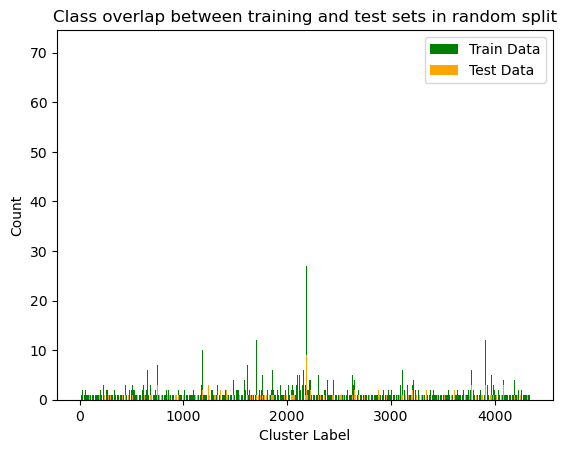

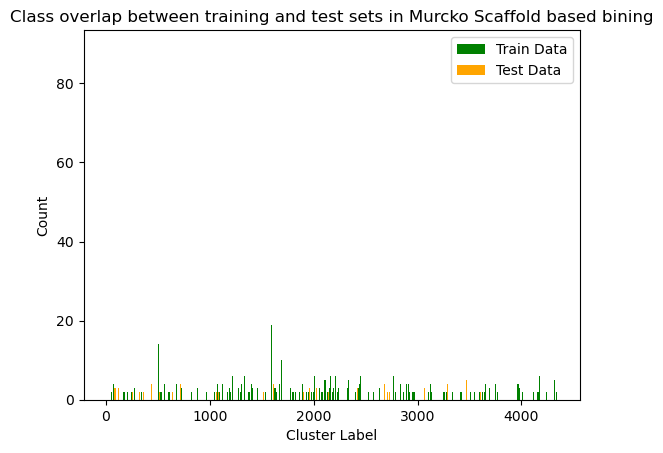

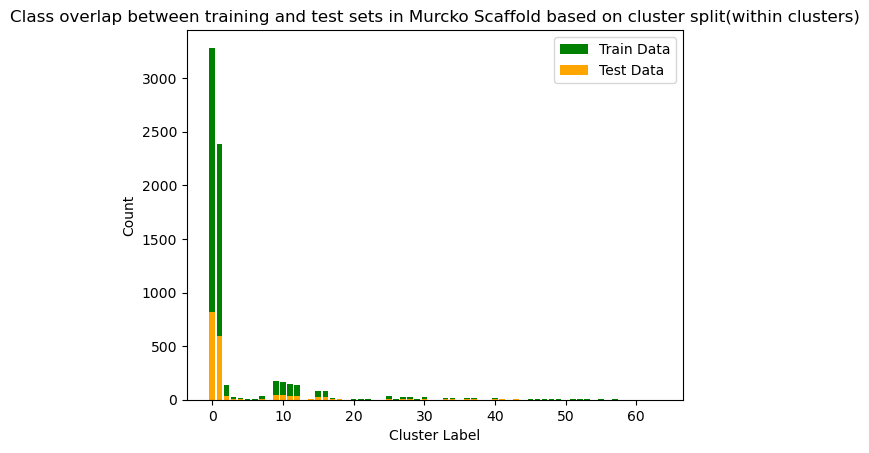

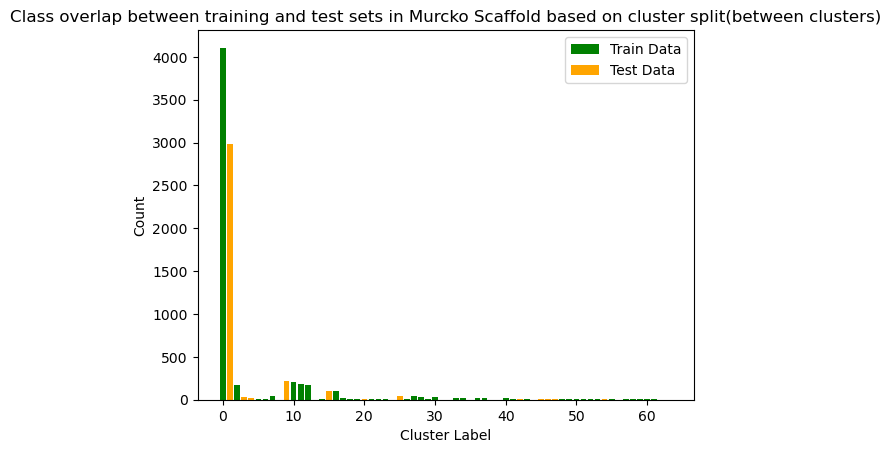

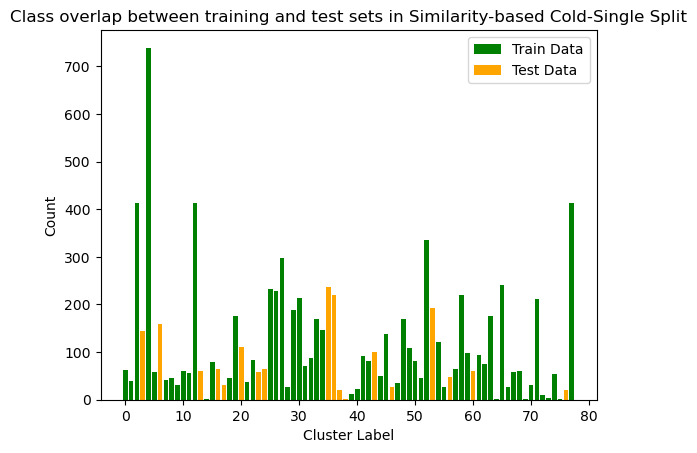

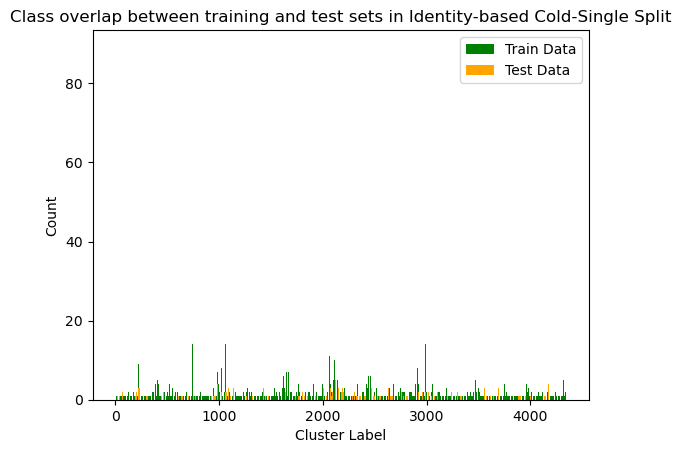

In [27]:
plot(train_RAND, test_RAND, 'random split', 'Label_SCF')
plot(train_SCF, test_SCF, 'Murcko Scaffold based bining','Label_SCF' )
plot(train_WC, test_WC, 'Murcko Scaffold based on cluster split(within clusters)', 'Label_WC_BC')
plot(train_BC, test_BC, 'Murcko Scaffold based on cluster split(between clusters)','Label_WC_BC')
plot(train_CCSe, test_CCSe, 'Similarity-based Cold-Single Split', 'Cluster_ID')
plot(train_ICSe, test_ICSe, 'Identity-based Cold-Single Split', 'Label_SCF')

In [28]:
def preprocessing_data(train_data, test_data):
    x_train_fps = train_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))
    x_test_fps = test_data['Molecule'].apply(lambda x: AllChem.GetMorganFingerprintAsBitVect(x, 2, nBits=2048))
    x_train_fps_array = np.array([list(fp.ToBitString()) for fp in x_train_fps], dtype=np.float32)
    x_test_fps_array = np.array([list(fp.ToBitString()) for fp in x_test_fps], dtype=np.float32)
    y_train = train_data['pIC50'].values.astype(np.float32)
    y_test = test_data['pIC50'].values.astype(np.float32)
    training_data = TensorDataset(torch.from_numpy(x_train_fps_array).float(), torch.from_numpy(y_train))
    test_data = TensorDataset(torch.from_numpy(x_test_fps_array).float(), torch.from_numpy(y_test))
    training_loader = DataLoader(training_data, batch_size=64)
    test_loader = DataLoader(test_data, batch_size=64)
    return training_loader, test_loader,x_train_fps_array,x_test_fps_array, y_train, y_test

### Model
As a model, we use a standard feed-forward network. This is similar to the one described in Talktorial T022. Here, however, we use pytorch instead of tensorflow. More details specific to Pytorch can be found in the pytorch tutorial.

In [29]:
class NeuralNetwork(nn.Module):
    """A simple linear forward neural network."""

    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(2048, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 1),
        )

    def forward(self, x):
        x = self.flatten(x.float())
        x = self.linear_relu_stack(x)
        return x

### Training
We now set up the pipeline of creating and training a model. With the model in place, we are ready to set up the training by defining a loss function and an optimization procedure. As a loss function, we take the mean squared error since we dealing with a regression task. For the stochastic gradient descent optimization method, we choose the Adam optimizer which is a standard choice.

In [30]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    with torch.no_grad():  # faster evaluation
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()

    test_loss /= num_batches
    return test_loss

To make our life simpler, when creating models, we encapsulate the model creation and training in a single function.

In [31]:
def create_and_fit_model(training_loader, test_loader, epochs=8, verbose=False):
    """
    Create and fit a model.

    Parameters
    ----------
    training_loader : torch.utils.data.DataLoader
        Data loader for the training data.
    test_loader : torch.utils.data.DataLoader
        Data loader for the test data.
    epochs : int, optional
        The number of epochs to train.
    verbose: bool, optional
        Print the current epoch and test loss.

    Returns
    -------
    model: NeuralNetwork
        A trained instance of `NeuralNetwork`.
    """
    model = NeuralNetwork().to("cpu")
    loss_fn = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    for i in range(epochs):
        if verbose:
            print("Epoch", i)
        train_loop(training_loader, model, loss_fn, optimizer)
        test_loss = test_loop(test_loader, model, loss_fn)
        if verbose:
            print(f"Test loss: {test_loss:>8f} \n")
    return model

Using this function, we can now create and train a predictive model.

In [32]:

training_loader_RAND, test_loader_RAND, x_train_RAND_fps_array, x_test_RAND_fps_array, y_train_RAND, y_test_RAND = preprocessing_data(train_RAND, test_RAND)
training_loader_SCF, test_loader_SCF,   x_train_SCF_fps_array, x_test_SCF_fps_array,  y_train_SCF, y_test_SCF  = preprocessing_data(train_SCF, test_SCF)
training_loader_WC,  test_loader_WC,    x_train_WC_fps_array,  x_test_WC_fps_array,   y_train_WC, y_test_WC   = preprocessing_data(train_WC, test_WC)
training_loader_BC,  test_loader_BC,    x_train_BC_fps_array,  x_test_BC_fps_array,   y_train_BC, y_test_BC   = preprocessing_data(train_BC, test_BC)
training_loader_CCSe, test_loader_CCSe, x_train_CCSe_fps_array,x_test_CCSe_fps_array, y_train_CCSe, y_test_CCSe = preprocessing_data(train_CCSe, test_CCSe)
training_loader_ICSe, test_loader_ICSe, x_train_ICSe_fps_array,x_test_ICSe_fps_array, y_train_ICSe, y_test_ICSe = preprocessing_data(train_ICSe, test_ICSe)

In [33]:
single_model_RAND = create_and_fit_model(training_loader_RAND, test_loader_RAND, verbose=True)
single_model_SCF = create_and_fit_model(training_loader_SCF, test_loader_SCF, verbose=True)
single_model_WC = create_and_fit_model(training_loader_WC, test_loader_WC, verbose=True)
single_model_BC = create_and_fit_model(training_loader_BC, test_loader_BC, verbose=True)
single_model_CCSe = create_and_fit_model(training_loader_CCSe, test_loader_CCSe, verbose=True)
single_model_ICSe = create_and_fit_model(training_loader_ICSe, test_loader_ICSe, verbose=True)

Epoch 0
Test loss: 13.157655 

Epoch 1
Test loss: 14.198734 

Epoch 2
Test loss: 15.816256 

Epoch 3
Test loss: 13.427299 

Epoch 4
Test loss: 14.355344 

Epoch 5
Test loss: 14.299753 

Epoch 6
Test loss: 13.775816 

Epoch 7
Test loss: 13.525240 

Epoch 0
Test loss: 14.670991 

Epoch 1
Test loss: 14.301146 

Epoch 2
Test loss: 16.846244 

Epoch 3
Test loss: 20.645392 

Epoch 4
Test loss: 16.187543 

Epoch 5
Test loss: 13.744888 

Epoch 6
Test loss: 13.663963 

Epoch 7
Test loss: 13.477299 

Epoch 0
Test loss: 15.995879 

Epoch 1
Test loss: 18.632918 

Epoch 2
Test loss: 17.304046 

Epoch 3
Test loss: 16.724756 

Epoch 4
Test loss: 17.257039 

Epoch 5
Test loss: 15.271540 

Epoch 6
Test loss: 14.246981 

Epoch 7
Test loss: 16.420170 

Epoch 0
Test loss: 16.865348 

Epoch 1
Test loss: 22.008064 

Epoch 2
Test loss: 18.313442 

Epoch 3
Test loss: 19.170893 

Epoch 4
Test loss: 18.032829 

Epoch 5
Test loss: 19.097080 

Epoch 6
Test loss: 18.687223 

Epoch 7
Test loss: 21.324603 

Epoch 0


### Evaluation
For uncertainty estimation, we are not too concerned with prediction quality. Therefore, we just visually check the correlation between predictions and true values.

In [34]:
# Convert x_test to a PyTorch tensor
def Evaluation(x_test_fps_array, y_test, single_model, split_method):
    x_test_tensor = torch.from_numpy(x_test_fps_array).float()
    y_test_tensor = torch.from_numpy(y_test).float()
    
    # Pass x_test_tensor to the model for prediction
    pred = single_model(x_test_tensor)
    # Convert pred and y_test to NumPy arrays
    pred_array = pred.detach().numpy()
    y_test_array = y_test_tensor.detach().numpy()
    
    sns.lmplot(
        data=pd.DataFrame(
            {
                "model": pred_array.flatten(),
                "true value": y_test_array.flatten(),
            }
        ),
        x="model",
        y="true value",
        scatter_kws={"s": 3},
    )
    
    # mean absolute error
    mae_single_model = torch.abs(pred - y_test_tensor).sum().item()
    
    # mean squared error
    mse_single_model = ((pred - y_test_tensor) ** 2).sum().item()
    
    
    display(
        Markdown(
            f"The mean absolute error is {mae_single_model:.2f} and the mean squared error is {mse_single_model:.2f} for {split_method} ."
        )
    )
    
    return plt.show()

The mean absolute error is 9392776.00 and the mean squared error is 42244748.00 for RAND_split .

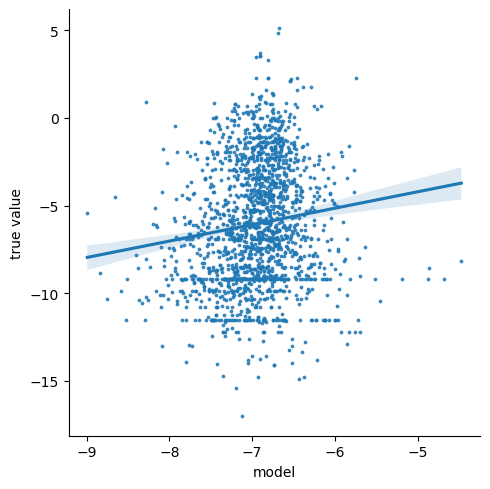

The mean absolute error is 5007929.50 and the mean squared error is 22748554.00 for SCF_split .

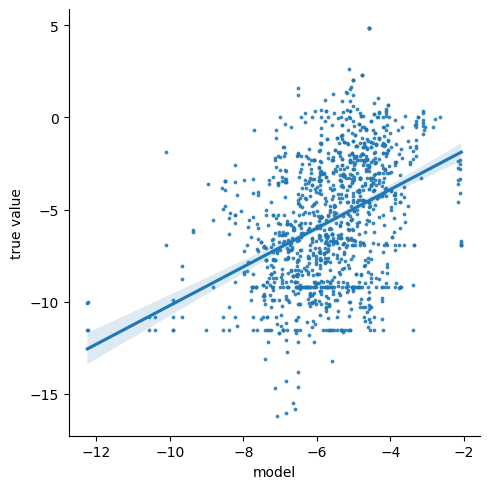

The mean absolute error is 10848996.00 and the mean squared error is 52515368.00 for WC_split .

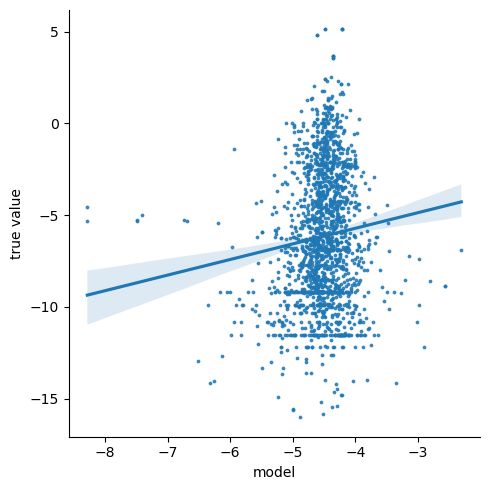

The mean absolute error is 40730148.00 and the mean squared error is 196712512.00 for BC_split .

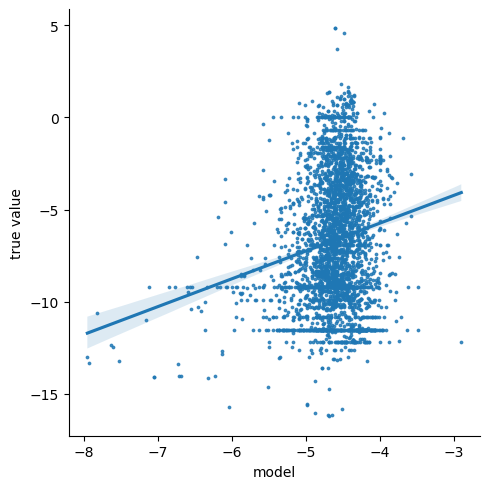

The mean absolute error is 8566021.00 and the mean squared error is 39728324.00 for CCSe_split .

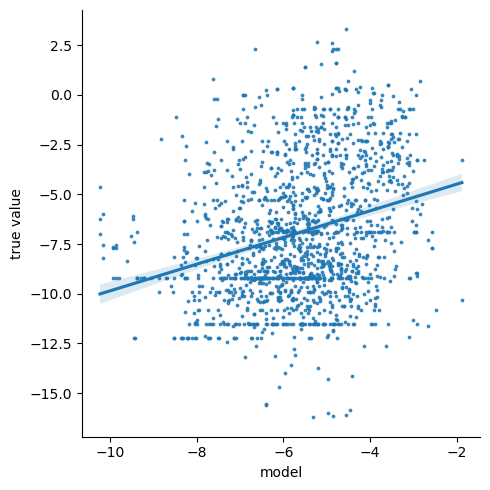

The mean absolute error is 10930955.00 and the mean squared error is 52802780.00 for ICSe_split .

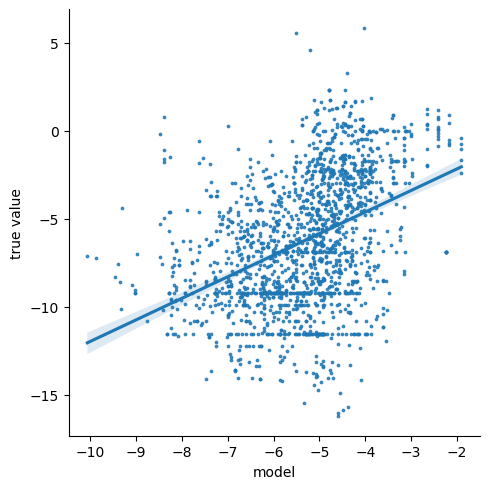

In [35]:
Evaluation(x_test_RAND_fps_array, y_test_RAND, single_model_RAND, 'RAND_split')
Evaluation(x_test_SCF_fps_array, y_test_SCF, single_model_SCF, 'SCF_split')
Evaluation(x_test_WC_fps_array, y_test_WC, single_model_WC, 'WC_split')
Evaluation(x_test_BC_fps_array, y_test_BC, single_model_WC, 'BC_split')
Evaluation(x_test_CCSe_fps_array, y_test_CCSe, single_model_CCSe, 'CCSe_split')
Evaluation(x_test_ICSe_fps_array, y_test_ICSe, single_model_ICSe, 'ICSe_split')

## Discussion

To determine which model is better among the given options, you can compare the performance metrics, namely the mean absolute error (MAE) and mean squared error (MSE). In general, a lower value for both MAE and MSE indicates better model performance.

Comparing the provided models based on the given metrics, we can see the following:

RAND_split: MAE = 9,543,160.00, MSE = 44,241,544.00

SCF_split: MAE = 5,228,417.00, MSE = 25,515,310.00

WC_split: MAE = 11,898,230.00, MSE = 70,714,136.00

BC_split: MAE = 44,453,808.00, MSE = 239,988,864.00

CCSe_split: MAE = 8,205,439.00, MSE = 38,695,612.00

ICSe_split: MAE = 11,136,668.00, MSE = 57,439,324.00

Based on the MAE and MSE values, the SCF_split model has the lowest values for both metrics among the given options. Therefore, the SCF_split model can be considered the better model, as it exhibits the smallest errors on average compared to the other models.

Here is the ranking of the models based on the given metrics:

1. SCF_split: It has the lowest values for both mean absolute error (MAE) and mean squared error (MSE), indicating the best performance among the models.
2. CCSe_split: It has the second-lowest MAE and MSE values, showing relatively better performance compared to the remaining models.
3. RAND_split: It has the third-lowest MAE and MSE values, indicating better performance compared to the remaining models.
4. ICSe_split: It has the fourth-lowest MAE and MSE values.
5. WC_split: It has the fifth-lowest MAE and MSE values.
6. BC_split: It has the highest MAE and MSE values among the given models.